# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [1]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [2]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [3]:
train.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [4]:
train.Fail.value_counts(normalize=True)

0    0.74139
1    0.25861
Name: Fail, dtype: float64

In [5]:
import category_encoders as ce
X = train.drop(columns='Fail')
y = train['Fail']

encoder = ce.OrdinalEncoder(handle_unknown='ignore')
X_transformed = encoder.fit_transform(X)
X_transformed.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location
0,2088270,1,1,2354911.0,1,1,1,1,1,60657.0,1,1,1,41.938007,-87.644755,1
1,555268,2,2,1044901.0,2,2,2,1,1,60636.0,2,2,2,41.772402,-87.683603,2
2,1751394,3,3,47405.0,1,1,3,1,1,60649.0,3,3,3,41.758779,-87.575054,3
3,1763905,4,4,6414.0,1,3,4,1,1,60632.0,4,1,4,41.812181,-87.707125,4
4,453326,5,5,24571.0,3,1,5,1,1,60629.0,5,1,5,NaN,NaN,5
5,1725221,6,6,2245580.0,4,1,6,1,1,60614.0,6,1,6,41.932632,-87.647973,6
6,1981372,7,7,32318.0,1,3,7,1,1,60606.0,7,1,7,41.878531,-87.639427,7
7,1072403,8,8,2241028.0,1,1,8,1,1,60620.0,8,4,8,41.735505,-87.643749,8
8,1464616,9,9,1544937.0,1,1,9,1,1,60660.0,9,1,9,41.993973,-87.660242,9
9,583261,10,10,2098003.0,1,1,10,1,1,60616.0,10,5,10,41.855282,-87.631993,10


In [6]:
X_transformed.isna().sum()

Inspection ID        0
DBA Name             0
AKA Name             0
License #            5
Facility Type        0
Risk                 0
Address              0
City                 0
State                0
Zip                 26
Inspection Date      0
Inspection Type      0
Violations           0
Latitude           198
Longitude          198
Location             0
dtype: int64

In [7]:
X_transformed.shape

(51916, 16)

In [8]:
X_transformed.describe()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location
count,5.191600e+04,51916.000000,51916.000000,5.191100e+04,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51890.000000,51916.000000,51916.000000,51916.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,6244.782110,5828.245974,1.549491e+06,5.146660,1.468931,5347.997804,1.042395,1.000193,60628.834669,1024.172779,3.115841,17156.098216,41.879568,-87.676663,5123.395716
std,6.202664e+05,4672.146569,4518.036102,9.018283e+05,20.700172,0.800569,3783.061647,0.833283,0.013878,22.736963,612.866714,2.844093,13700.565265,0.081126,0.059509,3648.342267
min,4.425000e+04,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,60007.000000,1.000000,1.000000,1.000000,41.644670,-87.914428,1.000000
25%,6.796205e+05,2124.000000,1793.000000,1.140745e+06,1.000000,1.000000,2035.000000,1.000000,1.000000,60614.000000,491.000000,1.000000,3317.750000,41.830296,-87.707857,1923.000000
50%,1.424226e+06,5439.000000,5037.000000,1.958619e+06,1.000000,1.000000,4849.000000,1.000000,1.000000,60625.000000,995.000000,2.000000,16252.500000,41.890166,-87.666524,4645.000000
75%,1.946952e+06,9758.000000,9230.000000,2.215507e+06,2.000000,2.000000,8259.000000,1.000000,1.000000,60643.000000,1541.000000,5.000000,29202.250000,41.939167,-87.634461,7935.000000
max,2.279709e+06,17049.000000,16351.000000,8.700606e+06,330.000000,4.000000,13954.000000,40.000000,2.000000,60827.000000,2257.000000,52.000000,42165.000000,42.021064,-87.525094,13411.000000


In [9]:
X_train = X_transformed.fillna(X_transformed.median())
X_train.isna().sum()

Inspection ID      0
DBA Name           0
AKA Name           0
License #          0
Facility Type      0
Risk               0
Address            0
City               0
State              0
Zip                0
Inspection Date    0
Inspection Type    0
Violations         0
Latitude           0
Longitude          0
Location           0
dtype: int64

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        min_samples_leaf=0.005, 
        oob_score=True, 
        n_jobs=-1)
)
y_train = y

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.6424581178505717, total=   6.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ....................... , score=0.7247787642730972, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


[CV] ....................... , score=0.7433208848171161, total=   4.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.0s remaining:    0.0s


[CV] ....................... , score=0.7416423429529931, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.0s remaining:    0.0s


[CV] ....................... , score=0.7366894494349786, total=   4.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s finished


array([0.64245812, 0.72477876, 0.74332088, 0.74164234, 0.73668945])

In [11]:
%%time
from sklearn.metrics import roc_auc_score


max_depths = list(range(13, 18)) + [None]

for max_depth in max_depths:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=100, 
            class_weight='balanced', 
            max_depth=max_depth, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

Max Depth: 13
ROC AUC, OOB: 0.753041999181294
Max Depth: 14
ROC AUC, OOB: 0.7528565789663632
Max Depth: 15
ROC AUC, OOB: 0.7534153736364689
Max Depth: 16
ROC AUC, OOB: 0.7510924677544069
Max Depth: 17
ROC AUC, OOB: 0.7522740279298935
Max Depth: None
ROC AUC, OOB: 0.7493511676080391
Wall time: 44.2 s


In [12]:
pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        min_samples_leaf=0.005,
        max_depth=15,
        oob_score=True, 
        n_jobs=-1)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')

array([0.64857644, 0.72692818, 0.74243347, 0.74305813, 0.73633641])

In [13]:
test.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


In [14]:
columns = X_train.columns.tolist()

In [15]:
test_transformed = encoder.fit_transform(test)

In [16]:
test_transformed.isna().sum()

Inspection ID          0
DBA Name            2144
AKA Name            1986
License #              2
Facility Type         54
Risk                   0
Address             1170
City                   5
State                  0
Zip                    8
Inspection Date       15
Inspection Type        9
Violations         13964
Latitude              61
Longitude             61
Location            1047
Fail                   0
dtype: int64

In [17]:
y_test = test_transformed.fillna(test_transformed.median())
y_test.isna().sum()

Inspection ID      0
DBA Name           0
AKA Name           0
License #          0
Facility Type      0
Risk               0
Address            0
City               0
State              0
Zip                0
Inspection Date    0
Inspection Type    0
Violations         0
Latitude           0
Longitude          0
Location           0
Fail               0
dtype: int64

In [18]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(y_test[columns])
y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
print('Max Depth:', max_depth)
print('ROC AUC, OOB:', roc_auc_score(y_test.Fail, y_pred))

Max Depth: None
ROC AUC, OOB: 0.5454690434174566


In [19]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

max_depths = list(range(1, 6))

for max_depth in max_depths:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        GradientBoostingClassifier(
            n_estimators=100,  
            max_depth=max_depth
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(y_test[columns])[:,1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y_test.Fail, y_pred_proba))

Max Depth: 1
ROC AUC, OOB: 0.6767527143801956
Max Depth: 2
ROC AUC, OOB: 0.6599276455546513
Max Depth: 3
ROC AUC, OOB: 0.6506619835254092
Max Depth: 4
ROC AUC, OOB: 0.6518028047470577
Max Depth: 5
ROC AUC, OOB: 0.6392254268968877
Wall time: 31.2 s


In [20]:
pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        GradientBoostingClassifier(
            n_estimators=100,  
            max_depth=1
        )
)
pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(y_test[columns])[:,1]
print('ROC AUC, OOB:', roc_auc_score(y_test.Fail, y_pred_proba))

ROC AUC, OOB: 0.6767527143801956


In [21]:
%%time
import eli5
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(pipe, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train, y_train)

Wall time: 1.63 s


In [22]:
eli5.show_weights(permuter, top=None, feature_names=X_train.columns.tolist())

Weight,Feature
0.0954 ± 0.0000,Inspection Type
0.0525 ± 0.0000,Violations
0.0129 ± 0.0000,Inspection ID
0.0051 ± 0.0000,License #
0.0039 ± 0.0000,Zip
0.0002 ± 0.0000,Facility Type
0 ± 0.0000,Location
0 ± 0.0000,Longitude
0 ± 0.0000,Latitude
0 ± 0.0000,Inspection Date


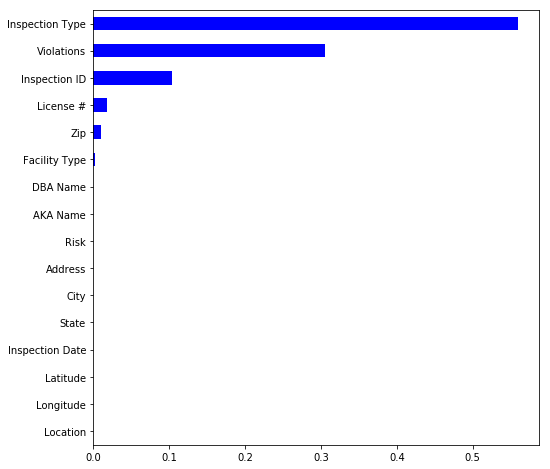

In [24]:
import matplotlib.pyplot as plt
def show_feature_importances(
    pipe, X, y, estimator_name='gradientboostingclassifier', 
    n=20, figsize=(8, 8)):
    
    # pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_, 
        X.columns)

    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='blue')

    
show_feature_importances(pipe, X_train, y_train)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. You may use any tools and techniques for categorical encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, engineer new features, and use any alternative categorical encoding instead of One-Hot or Ordinal/Label encoding._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot

_To earn a score of 3 for this part, make at least two of these visualization types._